In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
import os

def consolidate_csv_files(folder_path):
    all_data = []  # List to hold data from all CSV files

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            
            # Add a column with the filename as identifier
            file_name_without_extension = os.path.splitext(filename)[0]
            df['Combination'] = file_name_without_extension
            all_data.append(df)
            # df['SourceFile'] = filename
            # all_data.append(df)

    # Concatenate all dataframes
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.rename(columns={"Index":"Graph_id"}, inplace=True)
    # combined_df.sort_values(by=['Combination', 'Graph_id'], inplace=True)
    combined_df.drop(['File'], axis=1, inplace=True)
    

    return combined_df

# Example usage
folder_path = '../data/direct_transitivity'
combined_df = consolidate_csv_files(folder_path)
data = combined_df

# Now you can work with the combined_df DataFrame


In [3]:
combined_df.head()

,Graph_id,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,Combination
0,0,10,12,0,8,7,15,20,0,0.000556,2,0,0.020,d_235689
1,1,13,13,0,6,2,8,8,0,0.000291,2,0,0.001,d_235689
2,2,10,10,0,15,0,15,40,0,0.000040,2,0,0.002,d_235689
3,3,11,18,0,15,12,27,36,0,0.002283,2,0,0.003,d_235689
4,4,12,16,0,12,11,23,30,0,0.000364,2,0,0.002,d_235689


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the column
combined_df['Combination_Encoded'] = label_encoder.fit_transform(combined_df['Combination'])

# combined_df
# print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
combined_df.head()


,Graph_id,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,Combination,Combination_Encoded
0,0,10,12,0,8,7,15,20,0,0.000556,2,0,0.020,d_235689,298
1,1,13,13,0,6,2,8,8,0,0.000291,2,0,0.001,d_235689,298
2,2,10,10,0,15,0,15,40,0,0.000040,2,0,0.002,d_235689,298
3,3,11,18,0,15,12,27,36,0,0.002283,2,0,0.003,d_235689,298
4,4,12,16,0,12,11,23,30,0,0.000364,2,0,0.002,d_235689,298


In [6]:
# Setting an appealing theme
sns.set_style("dark")  # Other options: "dark", "white", "ticks"
sns.set_context("notebook")  # Other options: "paper", "notebook", "talk", "poster"
sns.set_palette("bright")  # Other options: "deep", "muted", "bright", "dark", "colorblind"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

#### Correlation Matrix of Important Variables

In [111]:
# Analyzing the performance of different combinations

# Correlation analysis
correlation_matrix = data[['Nodes', 'Total Nodes', 'Crossings', 'Opttime', 'Status']].corr()

# Visualization of combination performance
# Aggregating data based on combination
# combination_performance = data[data['Status'] == 2].groupby('Combination_Encoded').agg({'Opttime': 'mean', 'Crossings':'mean', 'Status': lambda x: (x == 2).mean() * 100})
combination_performance_status = data.groupby('Combination_Encoded').agg({'Status': lambda x: (x == 2).mean() * 100})
combination_performance_characteristics = data[data['Status'] == 2].groupby('Combination_Encoded').agg({'Opttime': 'mean', 'Crossings':'mean', 'Total Nodes': 'mean'})

combination_performance = pd.merge(combination_performance_status, 
         combination_performance_characteristics, 
         how='inner', 
         left_index=True,
         right_index=True
)


In [7]:
# Analyzing the performance of different combinations

# Correlation analysis
correlation_matrix = data[['Nodes', 'Total Nodes', 'Crossings', 'Opttime', 'Status']].corr()

# Visualization of combination performance
# Aggregating data based on combination
# combination_performance = data[data['Status'] == 2].groupby('Combination_Encoded').agg({'Opttime': 'mean', 'Crossings':'mean', 'Status': lambda x: (x == 2).mean() * 100})
combination_performance_status = data.groupby('Graph_id').agg({'Status': lambda x: (x == 2).mean() * 100})
combination_performance_characteristics = data[data['Status'] == 2].groupby('Graph_id').agg({'Opttime': 'mean', 'Crossings':'mean', 'Total Nodes': 'mean'})

combination_performance = pd.merge(combination_performance_status, 
         combination_performance_characteristics, 
         how='inner', 
         left_index=True,
         right_index=True
)


(array([363.,  48.,  23.,  15.,   6.,   6.,   9.,   1.,   2.,   1.]),
 array([3.41457548e-03, 1.50173268e+00, 3.00005078e+00, 4.49836888e+00,
        5.99668699e+00, 7.49500509e+00, 8.99332319e+00, 1.04916413e+01,
        1.19899594e+01, 1.34882775e+01, 1.49865956e+01]),
 <BarContainer object of 10 artists>)

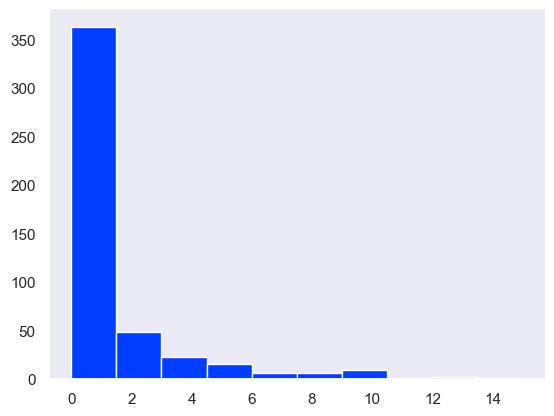

In [15]:
combination_performance['Status'] = np.round(combination_performance['Status'], 2)
combination_performance['Crossings'] = combination_performance['Crossings'].astype(int)
temp = combination_performance[(combination_performance['Status']== 100) & (combination_performance['Crossings']!=0)].sort_values('Crossings', ascending=False).reset_index()
plt.hist(temp['Opttime'])

In [16]:
temp

,Graph_id,Status,Opttime,Crossings,Total Nodes
0,680,100.0,7.835926,45,141.0
1,508,100.0,8.095484,43,115.0
2,583,100.0,9.137079,41,122.0
3,746,100.0,9.819573,39,154.0
4,390,100.0,4.430131,38,81.0
...,...,...,...,...,...
469,127,100.0,0.017870,1,31.0
470,122,100.0,0.025862,1,31.0
471,115,100.0,0.102640,1,34.0
472,114,100.0,0.022445,1,34.0


In [17]:
combined_df[combined_df['Graph_id'] == 680]

,Graph_id,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,Combination,Combination_Encoded
680,680,69,141,0,1201,1654,2855,20014,45,14.595728,2,1,0.887,d_235689,298
1830,680,69,141,0,1201,1654,2855,19746,45,4.208463,2,1,0.920,d_158,239
2980,680,69,141,0,1201,1654,2855,19746,45,3.854269,2,1,0.887,d_1567,228
4130,680,69,141,0,2402,3308,5710,26177,45,12.232862,2,1,0.577,d_234568,266
5280,680,69,141,0,1201,1654,2855,19746,45,10.381257,2,1,0.885,d_58,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583730,680,69,141,0,2402,3308,5710,25685,45,3.413958,2,1,0.589,d_124679,88
584880,680,69,141,0,2402,3308,5710,25909,45,4.445281,2,1,0.571,d_14589,209
586030,680,69,141,0,1201,1654,2855,19522,45,13.039304,2,1,0.835,d_69,504
587180,680,69,141,0,1201,1654,2855,19522,45,5.618970,2,1,0.817,d_169,249


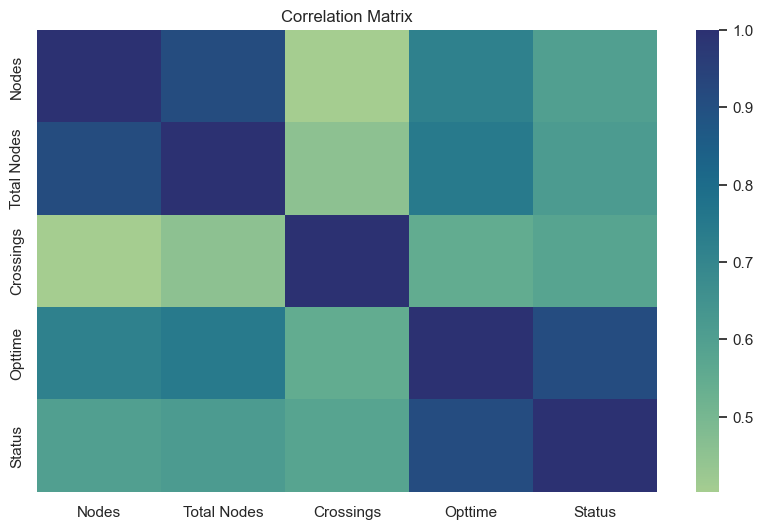

In [112]:
# Plotting correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap="crest")
plt.title('Correlation Matrix')
plt.show()

#### Combination Performances (Success Ones)

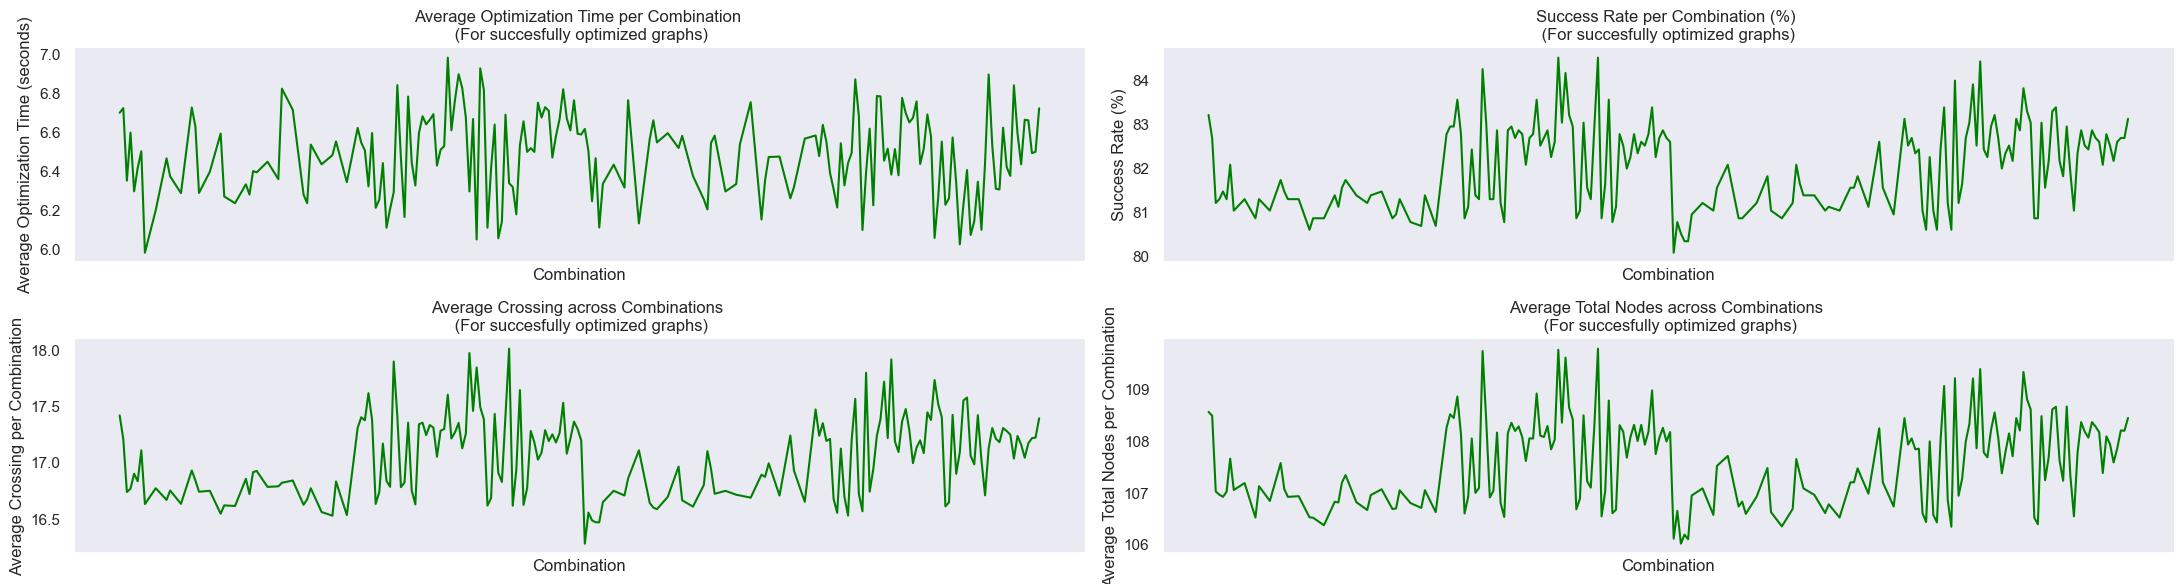

,Status,Opttime,Crossings,Total Nodes
Combination_Encoded,,,,
0,70.000000,6.328823,13.228571,95.968944
1,83.217391,6.700081,17.421108,108.564263
2,82.695652,6.724059,17.212408,108.488959
3,81.217391,6.352204,16.743041,107.029979
4,81.304348,6.598288,16.772193,106.968984


In [113]:
# Plotting combination performance
plt.figure(figsize=(22, 6))
thresh = 80

plt.subplot(2, 2, 1)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Opttime", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Average Optimization Time per Combination \n (For succesfully optimized graphs)')
plt.ylabel('Average Optimization Time (seconds)')
plt.xlabel('Combination')
plt.xticks([])


plt.subplot(2, 2, 2)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Status", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Success Rate per Combination (%) \n (For succesfully optimized graphs) ')
plt.ylabel('Success Rate (%)')
plt.xlabel('Combination')
plt.xticks([])


plt.subplot(2, 2, 3)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Crossings", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Average Crossing across Combinations \n (For succesfully optimized graphs)')
plt.ylabel('Average Crossing per Combination')
plt.xlabel('Combination')
plt.xticks([])

plt.subplot(2, 2, 4)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Total Nodes", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Average Total Nodes across Combinations \n (For succesfully optimized graphs)')
plt.ylabel('Average Total Nodes per Combination')
plt.xlabel('Combination')
plt.xticks([])

plt.tight_layout()
plt.show()

combination_performance.head()

#### Combination Performances (Failure Ones)

In [116]:
# Visualization of combination performance
# Aggregating data based on combination
# combination_performance = data[data['Status'] == 2].groupby('Combination_Encoded').agg({'Opttime': 'mean', 'Crossings':'mean', 'Status': lambda x: (x == 2).mean() * 100})
combination_performance_status = data.groupby('Combination_Encoded').agg({'Status': lambda x: (x == 9).mean() * 100})
combination_performance_characteristics = data[data['Status'] == 9].groupby('Combination_Encoded').agg({'Opttime': 'mean', 'Crossings':'mean', 'Total Nodes': 'mean'})

combination_performance = pd.merge(combination_performance_status, 
         combination_performance_characteristics, 
         how='inner', 
         left_index=True,
         right_index=True
)

KeyError: 'x'

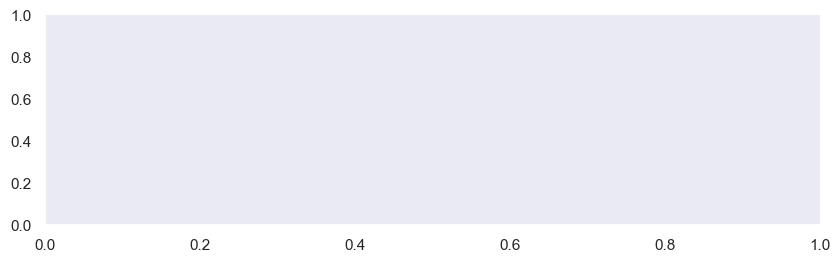

In [115]:
# Plotting combination performance
plt.figure(figsize=(22, 6))
thresh = 80

plt.subplot(2, 2, 1)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Opttime", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Average Optimization Time per Combination \n (For succesfully optimized graphs)')
plt.ylabel('Average Optimization Time (seconds)')
plt.xlabel('Combination')
plt.xticks([])


plt.subplot(2, 2, 2)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Status", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Success Rate per Combination (%) \n (For succesfully optimized graphs) ')
plt.ylabel('Success Rate (%)')
plt.xlabel('Combination')
plt.xticks([])


plt.subplot(2, 2, 3)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Crossings", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Average Crossing across Combinations \n (For succesfully optimized graphs)')
plt.ylabel('Average Crossing per Combination')
plt.xlabel('Combination')
plt.xticks([])

plt.subplot(2, 2, 4)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Total Nodes", data=combination_performance[combination_performance['Status']>thresh], color = 'green')
plt.title('Average Total Nodes across Combinations \n (For succesfully optimized graphs)')
plt.ylabel('Average Total Nodes per Combination')
plt.xlabel('Combination')
plt.xticks([])

plt.tight_layout()
plt.show()

combination_performance.head()

#### Graph Performances

In [66]:

# Visualization of combination performance
# Aggregating data based on combination
combination_performance = data.groupby('Graph_id').agg({'Opttime': 'mean', 'Status': lambda x: (x == 2).mean() * 100})
# combination_performance.rename({"Total Nodes": "Opttime"}, axis=1, inplace=True)


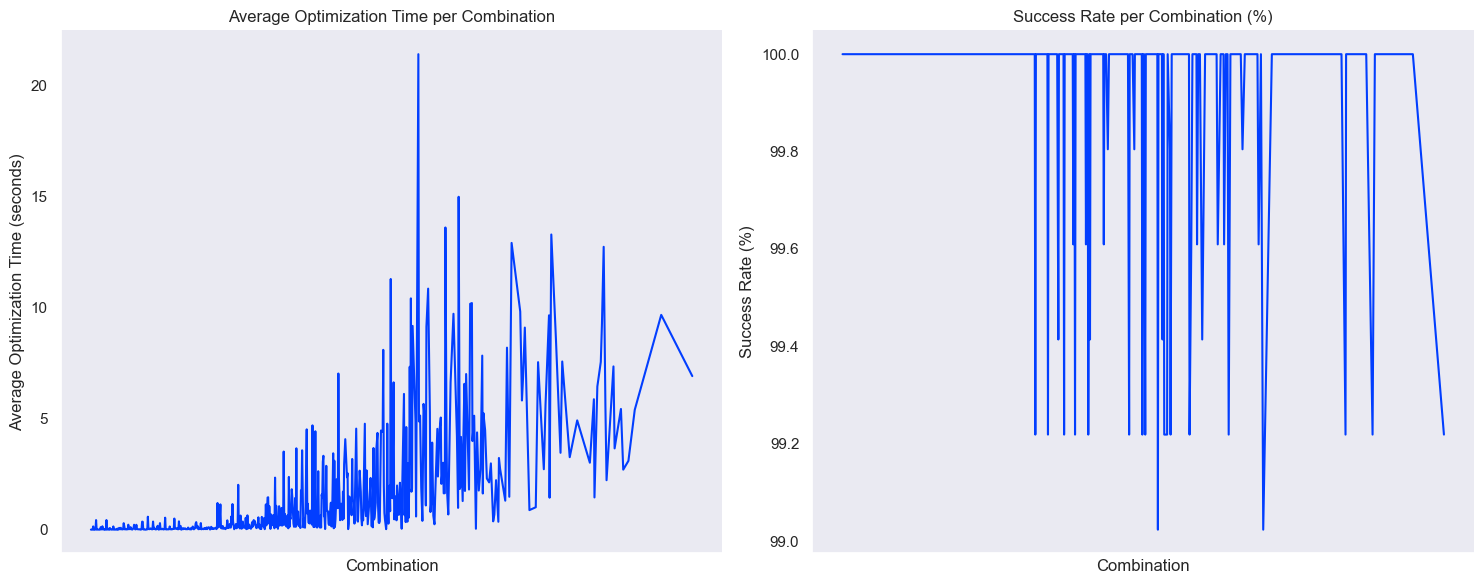

(                Nodes  Total Nodes  Crossings   Opttime    Status
 Nodes        1.000000     0.912967   0.402965  0.717916  0.597222
 Total Nodes  0.912967     1.000000   0.455090  0.744693  0.613090
 Crossings    0.402965     0.455090   1.000000  0.548437  0.579761
 Opttime      0.717916     0.744693   0.548437  1.000000  0.909197
 Status       0.597222     0.613090   0.579761  0.909197  1.000000,
            Opttime  Status
 Graph_id                  
 0         0.002922   100.0
 1         0.000548   100.0
 2         0.000053   100.0
 3         0.005507   100.0
 4         0.147989   100.0)

In [67]:
# Plotting combination performance
plt.figure(figsize=(15, 6))
thresh = 99

plt.subplot(1, 2, 1)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Opttime", data=combination_performance[combination_performance['Status']>thresh])
plt.title('Average Optimization Time per Combination')
plt.ylabel('Average Optimization Time (seconds)')
plt.xlabel('Combination')
plt.xticks([])


plt.subplot(1, 2, 2)
sns.lineplot(x=combination_performance[combination_performance['Status']>thresh].index, y="Status", data=combination_performance[combination_performance['Status']>thresh])
plt.title('Success Rate per Combination (%)')
plt.ylabel('Success Rate (%)')
plt.xlabel('Combination')
plt.xticks([])

plt.tight_layout()
plt.show()

correlation_matrix, combination_performance.head()

## What is the time on average for each graph (from Graph Id) for all the combinations?


In [79]:
GroupedByGraphId = pd.DataFrame(combined_df.groupby(['Graph_id'])['Opttime'].mean().reset_index())

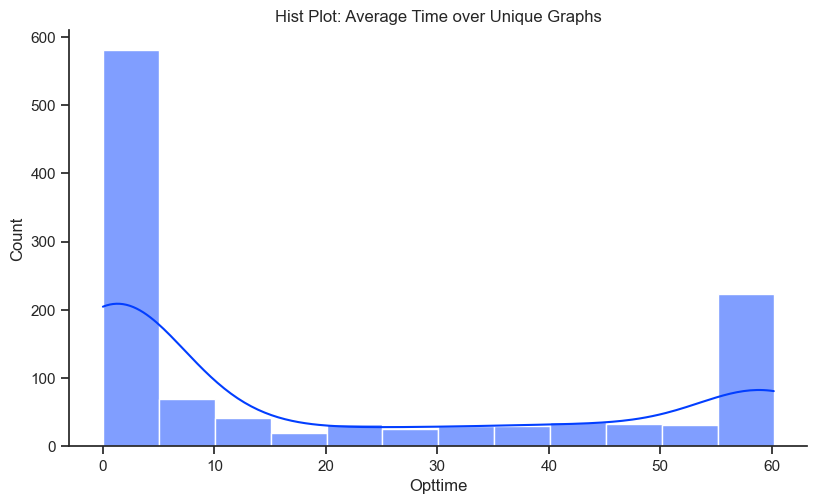

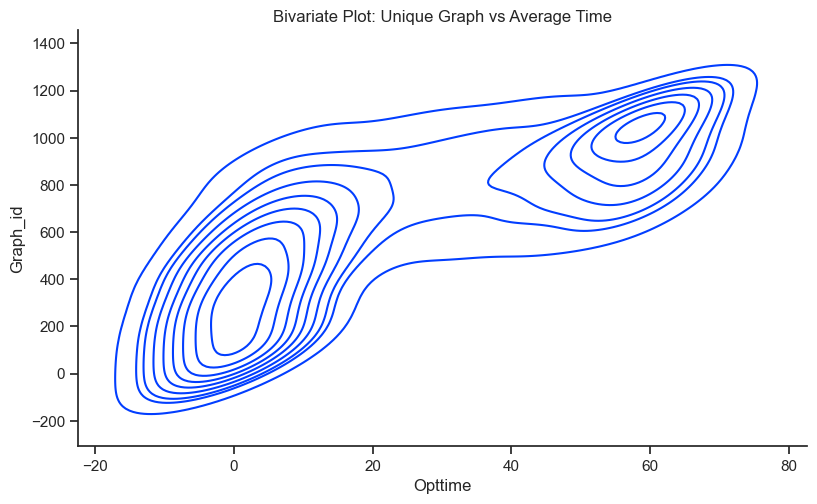

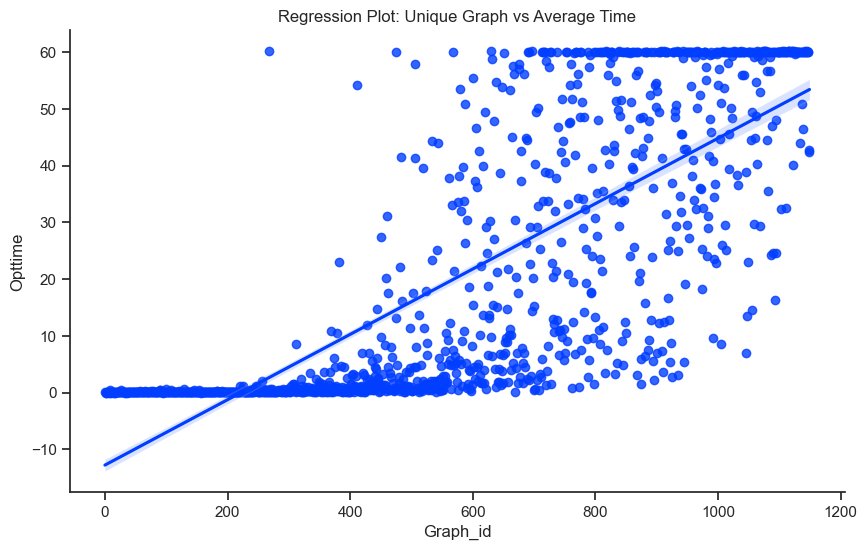

In [89]:



# Histogram
sns.displot(GroupedByGraphId['Opttime'], kde=True, aspect=10/6)
plt.title('Hist Plot: Average Time over Unique Graphs')
plt.show()

# Bivariate distribution
sns.displot(GroupedByGraphId, x="Opttime", y="Graph_id", kind="kde", aspect=10/6)
plt.title('Bivariate Plot: Unique Graph vs Average Time')
plt.show()

# # Line Plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
# plt.title('Line Plot: Unique Graph vs Average Time')
# plt.show()

# # Scatter Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
# plt.title('Scatter Plot: Unique Graph vs Average Time')
# plt.show()

# # Bar Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
# plt.title('Bar Plot: Nodes vs Average Time')
# # plt.xticks(rotation=45)
# plt.xticks([])
# plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Graph_id", y="Opttime", data=GroupedByGraphId)
plt.title('Regression Plot: Unique Graph vs Average Time')
plt.show()


## What is the average time taken based on number of nodes in a graph?

In [61]:
GroupedByNodes = pd.DataFrame(combined_df.groupby(['Total Nodes'])['Opttime'].mean().reset_index())


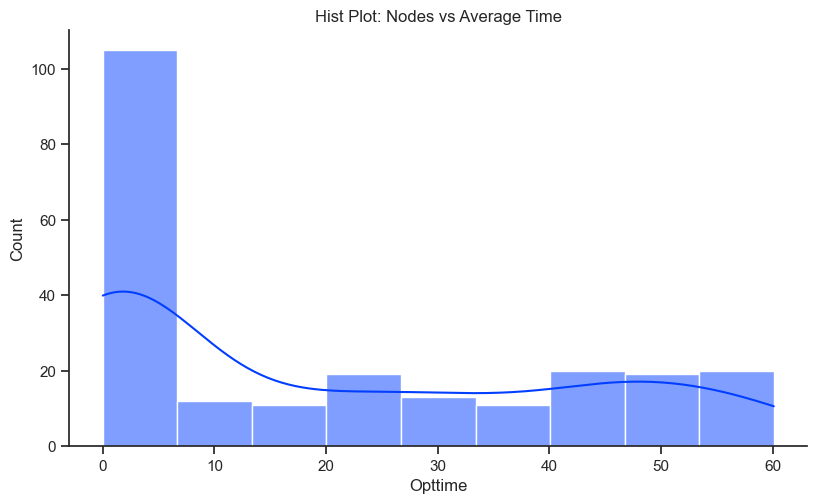

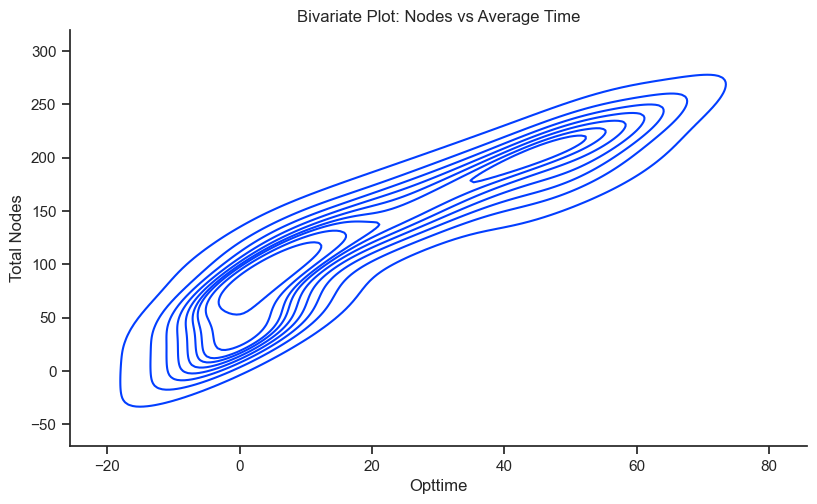

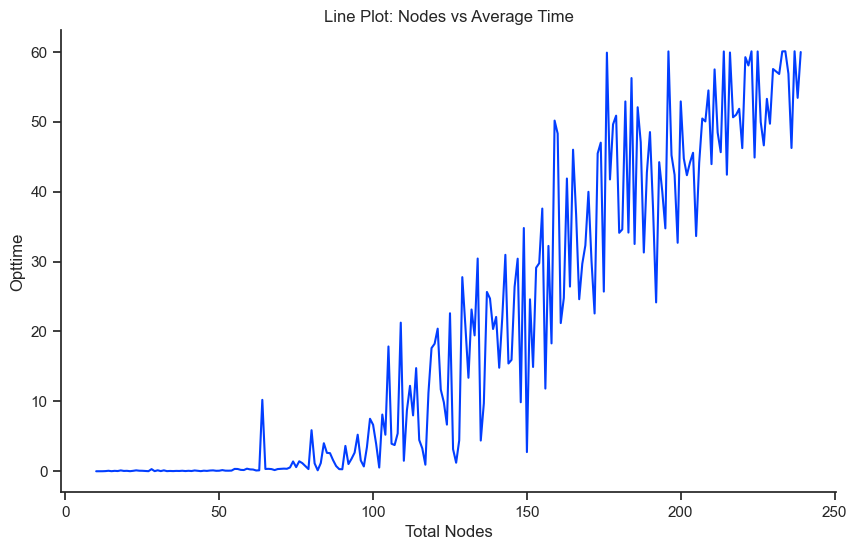

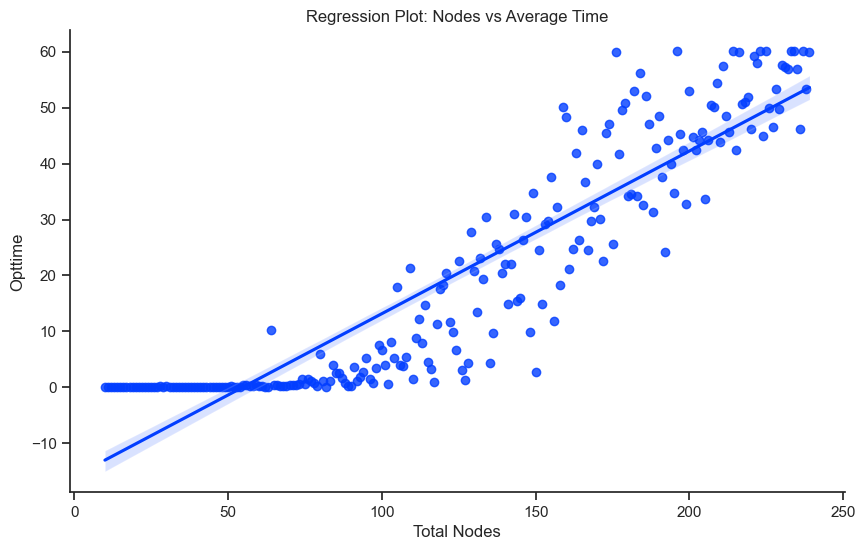

In [81]:


# Histogram
sns.displot(GroupedByNodes['Opttime'], kde=True, aspect=10/6)
plt.title('Hist Plot: Nodes vs Average Time')
plt.show()

# Bivariate distribution
sns.displot(GroupedByNodes, x="Opttime", y="Total Nodes", kind="kde", aspect=10/6)
plt.title('Bivariate Plot: Nodes vs Average Time')
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
plt.title('Line Plot: Nodes vs Average Time')
plt.show()

# # Scatter Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
# plt.title('Scatter Plot: Nodes vs Average Time')
# plt.show()

# # Bar Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
# plt.title('Bar Plot: Nodes vs Average Time')
# plt.xticks([])
# plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Total Nodes", y="Opttime", data=GroupedByNodes)
plt.title('Regression Plot: Nodes vs Average Time')
plt.show()


## What is the time on average for each combination for all the Graphs?


In [82]:
GroupedByCombination = pd.DataFrame(combined_df.groupby(['Combination_Encoded'])['Opttime'].mean().reset_index())


In [83]:
GroupedByCombination

,Combination_Encoded,Opttime
0,0,22.463389
1,1,15.659478
2,2,15.960603
3,3,16.441055
4,4,16.597222
...,...,...
507,507,21.918296
508,508,22.123533
509,509,22.641266
510,510,22.746301


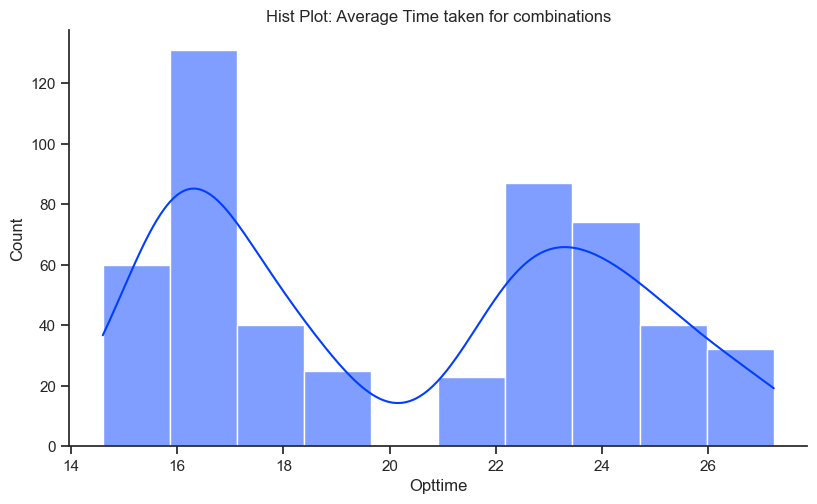

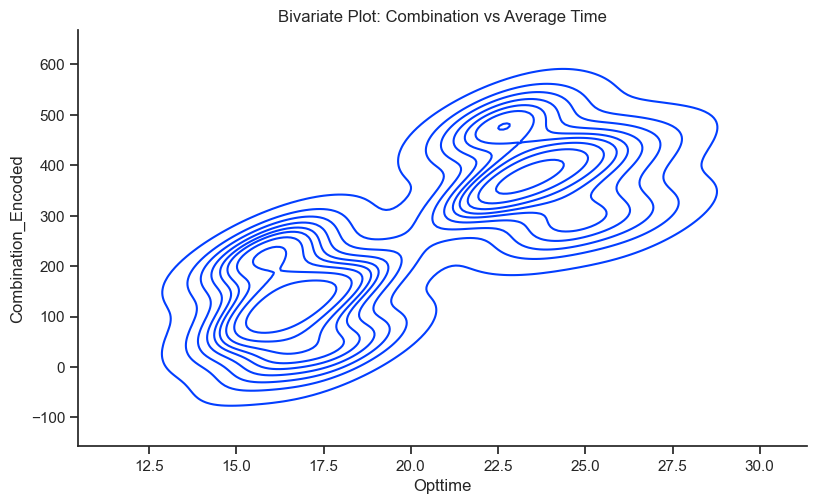

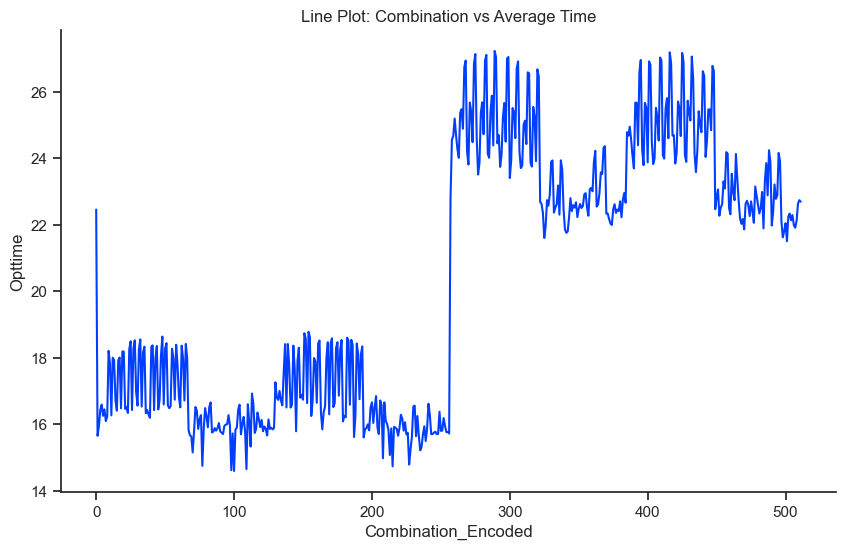

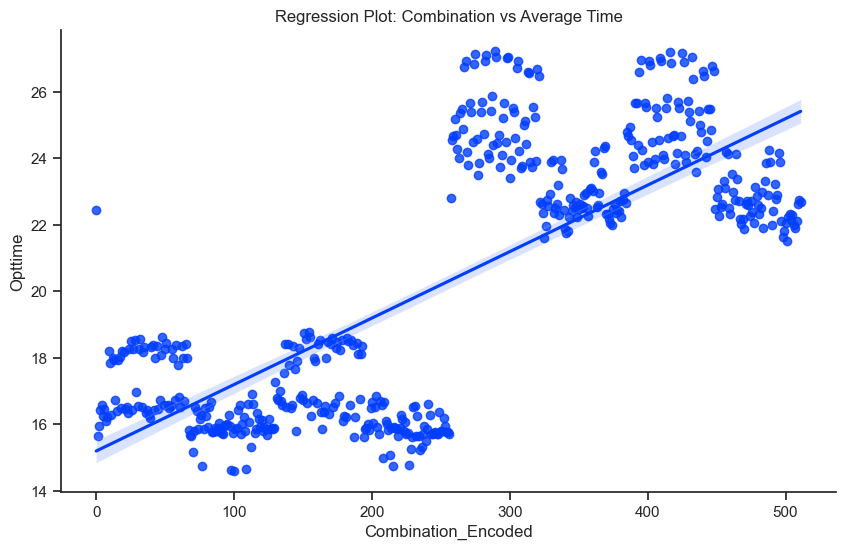

In [87]:


# Histogram
sns.displot(GroupedByCombination['Opttime'], kde=True, aspect=10/6)
plt.title('Hist Plot: Average Time taken for combinations')
plt.show()

# Bivariate distribution
sns.displot(GroupedByCombination, x="Opttime", y="Combination_Encoded", kind="kde", aspect=10/6)
plt.title('Bivariate Plot: Combination vs Average Time')
plt.show()

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
plt.title('Line Plot: Combination vs Average Time')
plt.show()

# # Scatter Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
# plt.title('Scatter Plot: Combination vs Average Time')
# plt.show()

# # Bar Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
# plt.title('Bar Plot: Combination vs Average Time')
# plt.xticks(rotation=45)
# plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Combination_Encoded", y="Opttime", data=GroupedByCombination)
plt.title('Regression Plot: Combination vs Average Time')
plt.show()
